In [9]:
import pandas as pd
import pylab as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv("./data/UCBerkeley.csv",index_col=0)
df.head()

,Admit,Gender,Dept,Freq
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353


In [107]:
size_dept = df.loc[df["Admit"]=="Admitted"].groupby("Dept").sum().reset_index()
size_dept.head()

,Dept,Freq
0,A,601
1,B,370
2,C,322
3,D,269
4,E,147


In [108]:
women = df.loc[df["Gender"]=="Female"].pivot_table(values="Freq",columns="Admit",index="Dept").reset_index()
women["women_admitted"] = 100*women["Admitted"]/(women["Rejected"]+women["Admitted"])
women

Admit,Dept,Admitted,Rejected,women_admitted
0,A,89,19,82.407407
1,B,17,8,68.000000
2,C,202,391,34.064081
3,D,131,244,34.933333
4,E,94,299,23.918575
5,F,24,317,7.038123


In [109]:
men = df.loc[df["Gender"]=="Male"].pivot_table(values="Freq",columns="Admit",index="Dept").reset_index()
men["men_admitted"] = 100*men["Admitted"]/(men["Rejected"]+men["Admitted"])
men

Admit,Dept,Admitted,Rejected,men_admitted
0,A,512,313,62.060606
1,B,353,207,63.035714
2,C,120,205,36.923077
3,D,138,279,33.093525
4,E,53,138,27.748691
5,F,22,351,5.898123


In [118]:
men_apply = df.loc[df["Gender"]=="Male"].groupby("Dept").sum().reset_index()
men_apply.columns = ["Dept","Men_apply"]
female_apply = df.loc[df["Gender"]=="Female"].groupby("Dept").sum().reset_index()
female_apply.columns = ["Dept","Women_apply"]


In [119]:
gender = pd.merge(men,women,on="Dept")
df_all = pd.merge(gender,size_dept,on="Dept")
df_all = pd.merge(df_all,men_apply,on="Dept")
df_all = pd.merge(df_all,female_apply,on="Dept")
df_all

,Dept,Admitted_x,Rejected_x,men_admitted,Admitted_y,Rejected_y,women_admitted,Freq,Men_apply,Women_apply
0,A,512,313,62.060606,89,19,82.407407,601,825,108
1,B,353,207,63.035714,17,8,68.000000,370,560,25
2,C,120,205,36.923077,202,391,34.064081,322,325,593
3,D,138,279,33.093525,131,244,34.933333,269,417,375
4,E,53,138,27.748691,94,299,23.918575,147,191,393
5,F,22,351,5.898123,24,317,7.038123,46,373,341


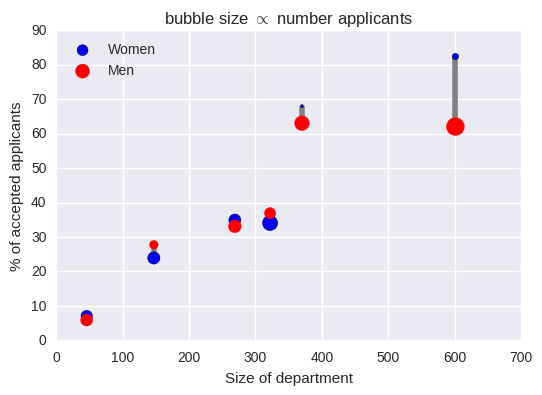

In [144]:
plt.figure(figsize=(6,4))

plt.vlines(df_all["Freq"],df_all["men_admitted"],df_all["women_admitted"],color="gray",linewidth=4)
plt.scatter(df_all["Freq"],df_all["women_admitted"],s=df_all["Women_apply"]/5,zorder=3,label="Women")
plt.scatter(df_all["Freq"],df_all["men_admitted"],s=df_all["Men_apply"]/5,color="red",zorder=3,label="Men")
plt.legend(loc="upper left")
plt.xlabel("Size of department")
plt.ylabel("% of accepted applicants")

plt.title("bubble size $\propto$ number applicants ")

In [112]:
pd.crosstab(df["Admit"],df["Gender"],values=df["Freq"],aggfunc=sum)

Gender,Female,Male
Admit,,
Admitted,557,1198
Rejected,1278,1493


In [ ]:
- Is there discrimination?
- Why is the paradox happening?